### Non-homogenious 1D Heat Transfer Equation | Explicit Numerical Solution

by Kishkenebayeva Altynay 29.10.24 | CFD Fall 2024

### Setting up

Importing libraries

In [1]:
import numpy as np
from numpy import sin, cos, exp, pi
import matplotlib.pyplot as plt
from scipy.integrate import quad

Reading files

In [2]:
# Reading files
def read_file(file_name):
    with open(file_name, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        line = line.strip()
        if not line.startswith('#') and line:
            data.append(line)
    return data

# Reading files
params_data = read_file('params.dat')
rhs_data = read_file('rhs.dat')
bc_data = read_file('bc.dat')
init_data = read_file('init.dat')

# Parse params.dat
Nx = int(params_data[0].split('=')[1].strip())
time_iter = int(params_data[1].split('=')[1].strip())
batch = int(params_data[2].split('=')[1].strip())
L = float(params_data[3].split('=')[1].strip())

k1 = float(params_data[4].split('=')[1].strip())
cp1 = float(params_data[5].split('=')[1].strip())
rho1 = float(params_data[6].split('=')[1].strip())

k2 = float(params_data[7].split('=')[1].strip())
cp2 = float(params_data[8].split('=')[1].strip())
rho2 = float(params_data[9].split('=')[1].strip())

n_terms = int(params_data[10].split('=')[1].strip())

# Compute a1 and a2
a1 = k1 / (cp1 * rho1)
a2 = k2 / (cp2 * rho2)

print(a1, a2)

# Parse rhs.dat
rhs_function = rhs_data[0].strip()

# Parse bc.dat
right_bc = bc_data[1].split(':')[1].strip() 
left_bc = bc_data[0].split(':')[1].strip()
right_type = bc_data[1].split(':')[0].strip()
left_type = bc_data[0].split(':')[0].strip()

# Parse init.dat
T_source = float(init_data[0].split('=')[1].strip())
T_init = float(init_data[1].split('=')[1].strip())

def rhs_func(x):
    return eval(rhs_function)

print(T_init)

9.717097170971709e-05 8.24385732094744e-05
25.0


### Analytical solution
Not optimized, but it works!

In [3]:
L = L/2
x = np.linspace(0, L, Nx)
t = np.linspace(0, time_iter, time_iter)

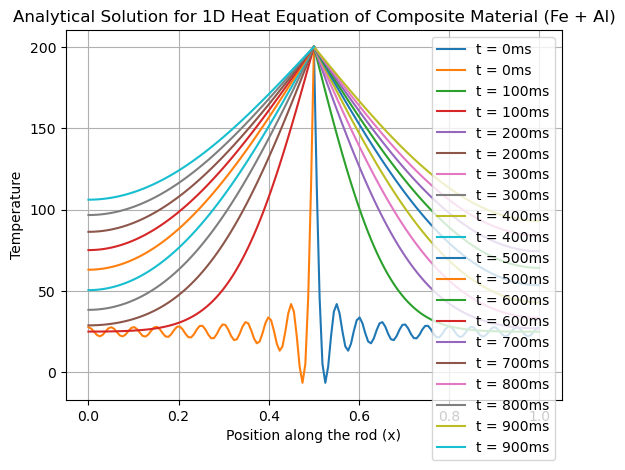

In [4]:
#------------------------------------------Left material
def v(x, k, L, T_source=T_source):
    return -x**3/(6*k) + L**3/(6*k) + T_source

# Compute Fourier coefficients
def compute_fourier_coefficients(v, L, n_terms, T_init=T_init):
    def a_n(n):
        integrand = lambda x: (T_init - v(x, k1, L)) * cos((2*n+1) * pi * x / (2 * L))
        result, _ = quad(integrand, 0, L)
        return (2 / L) * result
    coefficients = [a_n(n) for n in range(0, n_terms)]
    return coefficients

def w(x, t, k, cp, rho, coefficients):
    w_sum = 0
    for n in range(0, n_terms):
        lambd = (2*n+1)*pi / (2*L)
        w_sum += coefficients[n] * cos(lambd * x) * exp(-k * lambd**2 * t / (cp * rho))
    return w_sum

# Full solution u(x, t) = v(x) + w(x, t)
def u(x, t, v, w, k, L):
    return v(x, k, L) + w(x, t, k, cp1, rho1, coefficients)

coefficients = compute_fourier_coefficients(v, L, n_terms)

#------------------------------------------Right material
def v2(x, k, L, T_source=T_source):
    return -x**3 / (6 * k) + L**2 * x / (2 * k) + T_source

def compute_fourier_coefficients2(v, L, n_terms, T_init=T_init):
    def a_n2(n):
        integrand = lambda x: (T_init - v(x, k2, L)) * sin((n + 0.5) * pi * x / L)
        result, _ = quad(integrand, 0, L)
        return (2 / L) * result
    coefficients2 = [a_n2(n) for n in range(n_terms)]
    return coefficients2

def w2(x, t, k, cp, rho, coefficients):
    w_sum = 0
    for n in range(n_terms):
        lambd = (n + 0.5) * pi / L
        w_sum += coefficients[n] * sin(lambd * x) * exp(-k * lambd**2 * t / (cp * rho))
    return w_sum

def u2(x, t, v, w, k, L):
    return v(x, k, L) + w(x, t, k, cp2, rho2, coefficients2)

coefficients2 = compute_fourier_coefficients2(v2, L, n_terms)

# Plotting
for i in range(0, time_iter, batch):
    u_analytical2 = np.array([u2(xi, t[i], v2, w2, k2, L) for xi in x])
    u_analytical = np.array([u(xi, t[i], v, w, k1, L) for xi in x])
    plt.plot(x + L, u_analytical2, label=f't = {i}ms')
    plt.plot(x, u_analytical, label=f't = {i}ms')

plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature')
plt.title('Analytical Solution for 1D Heat Equation of Composite Material (Fe + Al)')
plt.legend()
plt.grid(True)
plt.show()


### Numerical solution (Explicit method)

Numerical computation of heat transfer for Fe + Al

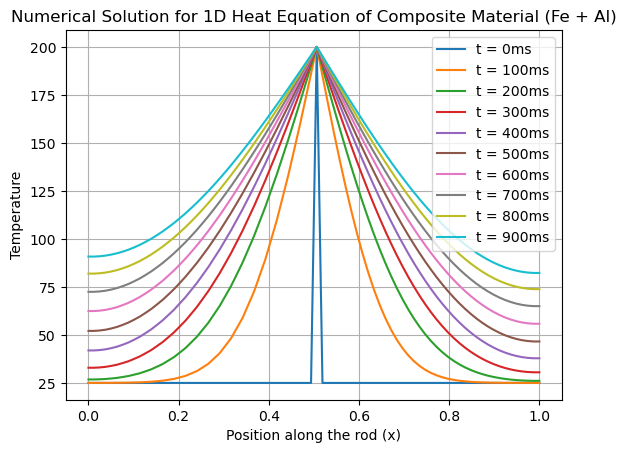

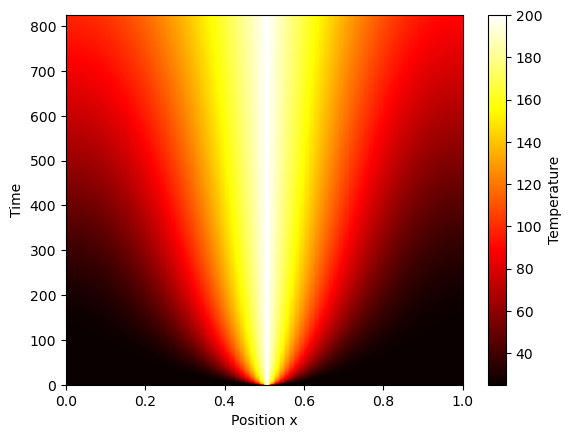

array([ 98.98146737,  98.98146737,  99.13926348,  99.45934159,
        99.93179724, 100.56996977, 101.35428982, 102.30659829,
       103.39813411, 104.65866315, 106.05092782, 107.61183257,
       109.29652316, 111.14806649, 113.11509404, 115.24569435,
       117.48322262, 119.87951277, 122.3740067 , 125.0209047 ,
       127.75718959, 130.63798163, 133.59931392, 136.6957501 ,
       139.86390057, 143.15630347, 146.51165337, 149.97903945,
       153.50068976, 157.12090322, 160.78679705, 164.53665533,
       168.32371301, 172.17916303, 176.06342905, 179.99971281,
       183.95651353, 187.94834131, 191.95245187, 195.97418124,
       200.        , 195.49690307, 191.00150882, 186.52150436,
       182.06454504, 177.63823867, 173.25013007, 168.90768581,
       164.61827939, 160.38917674, 156.22752227, 152.14032535,
       148.13444748, 144.21658993, 140.3932821 , 136.67087053,
       133.05550858, 129.55314684, 126.16952419, 122.91015966,
       119.78034486, 116.78513724, 113.92935386, 111.21

In [5]:
L = L * 2
x = np.linspace(0, L, Nx)
t = np.linspace(0, time_iter, time_iter)

def heat_1D(Nx, L, T_source, k1, cp1, rho1, k2, cp2, rho2, time_iter, batch, left_bc, right_bc, T_init):
    dx = L / (Nx - 1)
    u = np.full_like(x, T_init) 
    u_new = np.zeros_like(u)

    f = rhs_func(x)
    dt = 0.5 * dx**2 / max(k1 / (cp1 * rho1), k2 / (cp2 * rho2))
    u_all = np.zeros((time_iter, Nx))

    for t in range(0, time_iter):
        for i in range(1, Nx//2):
            u_new[i] = (k1 / (cp1 * rho1)) * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1]) + u[i] + dt * f[i] / (cp1 * rho1)
        for i in range(Nx//2+1, Nx-1):
            u_new[i] = (k2 / (cp2 * rho2)) * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1]) + u[i] + dt * f[i] / (cp2 * rho2)

        # Apply boundary conditions
        if left_type == 'D':
            u_new[0] = left_bc
        elif left_type == 'N':
            u_new[0] =  u_new[1]
        u_new[Nx//2] = T_source
        if right_type == 'D':
            u_new[-1] = right_bc
        elif right_type == 'N':
            u_new[-1] = u_new[-2]

        u = u_new.copy()
        u_all[t, :] = u

    # Plot results at every nth batch
    for t in range(0, time_iter, batch):
        plt.plot(x, u_all[t, :], label=f't = {t}ms')

    plt.xlabel('Position along the rod (x)')
    plt.ylabel('Temperature')
    plt.title('Numerical Solution for 1D Heat Equation of Composite Material (Fe + Al)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Heatmap
    plt.imshow(u_all, extent=[0, L, 0, time_iter * dt], aspect='auto', cmap='hot', origin='lower')
    plt.colorbar(label='Temperature')
    plt.xlabel('Position x')
    plt.ylabel('Time')
    plt.show()

    return u

u_numerical_all = heat_1D(
    Nx=Nx, L=L, T_source=T_source, 
    k1=k1, cp1=cp1, rho1=rho1, 
    k2=k2, cp2=cp2, rho2=rho2, 
    time_iter=time_iter, batch=batch, 
    left_bc=left_bc, right_bc=right_bc, 
    T_init=T_init
)
u_numerical_all

### Error

In [6]:
u_analytical_all = np.concatenate((u_analytical, u_analytical2))
rmse = np.sqrt(np.mean(u_analytical_all[::2] - u_numerical_all)**2)
print(rmse)


4.363112403559709


436% error!!!